## Import Library

In [22]:
import pandas as pd

## Load data

In [23]:
import os
for dirname, _, filenames in os.walk('../data/report/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/report/Customer_report_data.csv


In [24]:
data = pd.read_csv("../data/report/Customer_report_data.csv")
data.head()

,CustomerKey,Country,State,Gender,Age,Customer_Segment,First_Order_Date,Last_Order_Date,Recency,Lifespan,Total_Orders,Total_Sales,Total_Quantity,Total_Products,Avg_Order_Value,Avg_Monthly_Spend,Cluster
0,1000050,United Kingdom,South Lakeland,Female,42,At-Risk / Low-Value Customers,2017-02-11,2020-02-22,364,36,2,1292.970009,5,4,646.485004,35.915834,1
1,1000168,United Kingdom,New Forest,Male,51,Loyal Customers,2018-07-21,2019-11-02,476,16,3,10160.859987,41,10,3386.953329,635.053749,0
2,1000242,United Kingdom,Newark and Sherwood,Female,21,At-Risk / Low-Value Customers,2016-10-17,2018-08-31,904,22,2,8010.959999,19,4,4005.480000,364.134545,1
3,100040,Australia,Victoria,Female,80,At-Risk / Low-Value Customers,2018-08-30,2018-08-30,905,0,1,4158.000000,9,3,4158.000000,4158.000000,1
4,1000489,United Kingdom,York,Female,37,At-Risk / Low-Value Customers,2017-06-02,2018-12-24,789,18,2,3739.610005,23,10,1869.805002,207.756111,1


## Get data for model

In [34]:
features = [
    'Total_Sales',
    'Total_Orders',
    'Total_Quantity',
    'Total_Products',
    'Age',
    'Recency',
    'Avg_Order_Value',
    'Avg_Monthly_Spend',
    'Gender',
    'Country'
]
df = data[features]
df.head()

,Total_Sales,Total_Orders,Total_Quantity,Total_Products,Age,Recency,Avg_Order_Value,Avg_Monthly_Spend,Gender,Country
0,1292.970009,2,5,4,42,364,646.485004,35.915834,Female,United Kingdom
1,10160.859987,3,41,10,51,476,3386.953329,635.053749,Male,United Kingdom
2,8010.959999,2,19,4,21,904,4005.480000,364.134545,Female,United Kingdom
3,4158.000000,1,9,3,80,905,4158.000000,4158.000000,Female,Australia
4,3739.610005,2,23,10,37,789,1869.805002,207.756111,Female,United Kingdom


In [35]:
df['Recency'].describe()

count    11887.000000
mean       614.142088
std        406.202795
min          0.000000
25%        366.000000
50%        508.000000
75%        795.000000
max       1877.000000
Name: Recency, dtype: float64

## Create Lable

In [36]:
# Ví dụ: Nếu không mua hàng trong 12 tháng gần nhất => churn
df['Churn'] = df['Recency'].apply(lambda x: 1 if x > 366 else 0)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15464\2543945023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Recency'].apply(lambda x: 1 if x > 366 else 0)


## Preprocessing

In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Country'] = LabelEncoder().fit_transform(df['Country'])

# Chọn features và label
X = df[features]
y = df['Churn']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tách train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


C:\Users\Acer\AppData\Local\Temp\ipykernel_15464\1347121704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_15464\1347121704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = LabelEncoder().fit_transform(df['Country'])


## Train Model
### 1.Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00      1805

    accuracy                           1.00      2378
   macro avg       1.00      1.00      1.00      2378
weighted avg       1.00      1.00      1.00      2378

Accuracy: 1.0


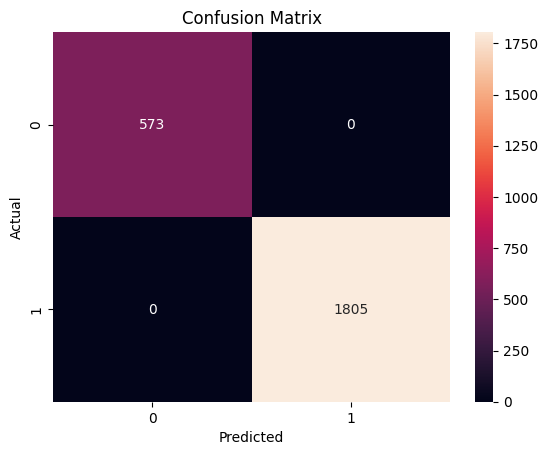

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

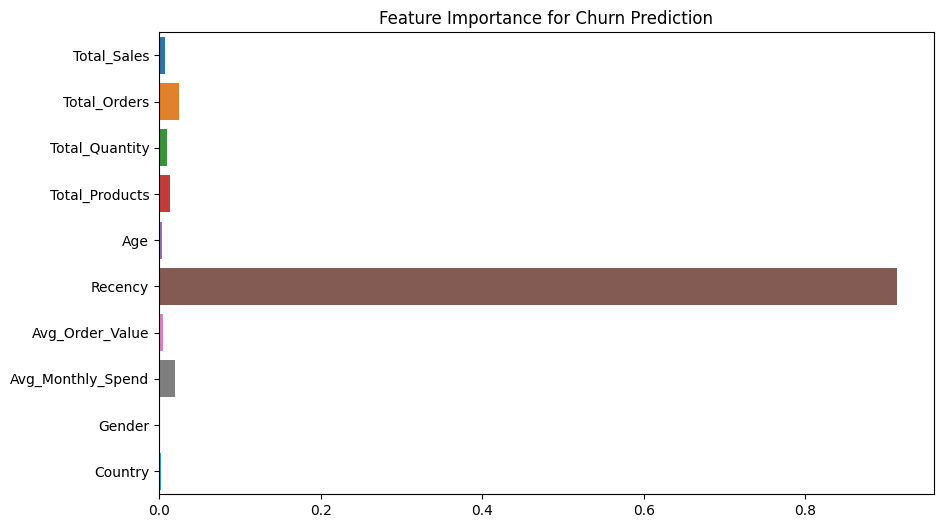

In [42]:
importances = model.feature_importances_
feat_names = df[features].columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance for Churn Prediction")
plt.show()

**Conclusion:**
1. Recency is the most important factor.
2. The secondary factors play a very small role:
   - Avg_Monthly_Spend, Total_Orders, Total_Quantity, Total_Products have a slight influence.
   - Age, Country, Gender, Avg_Order_Value and Total_Sales have almost no influence on churn/active distinction — at least in the current model.

### Model improvement:
- Because Recency dominates so strongly, if you want to make a model that "guesses when Recency is high".
  - Train the model **without using Recency** → to explore the influence of the remaining factors.
- Create additional behavioral features such as:
  - Time between the last 2 purchases.
  - Spending trends over time (decreasing?).
  - Change in purchase frequency in the last 6 months.

In [52]:
features = [
    'Total_Sales',
    'Total_Orders',
    'Total_Quantity',
    'Total_Products',
    'Recency',
    'Avg_Order_Value',
    'Avg_Monthly_Spend'
]
df = data[features]
df.head()

,Total_Sales,Total_Orders,Total_Quantity,Total_Products,Recency,Avg_Order_Value,Avg_Monthly_Spend
0,1292.970009,2,5,4,364,646.485004,35.915834
1,10160.859987,3,41,10,476,3386.953329,635.053749
2,8010.959999,2,19,4,904,4005.480000,364.134545
3,4158.000000,1,9,3,905,4158.000000,4158.000000
4,3739.610005,2,23,10,789,1869.805002,207.756111


In [53]:
# Ví dụ: Nếu không mua hàng trong 12 tháng gần nhất => churn
df['Churn'] = df['Recency'].apply(lambda x: 1 if x > 366 else 0)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15464\2543945023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Recency'].apply(lambda x: 1 if x > 366 else 0)


In [ ]:
# Choose specific features
features_without_recency = [
    'Total_Sales',
    'Total_Orders',
    'Total_Quantity',
    'Total_Products',
    'Avg_Order_Value',
    'Avg_Monthly_Spend'
]

# Chọn features và label
X = df[features_without_recency]
y = df['Churn']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tách train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 2. XGBoost (Extreme Gradient Boosting) Model

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.57      0.20      0.30       573
           1       0.79      0.95      0.86      1805

    accuracy                           0.77      2378
   macro avg       0.68      0.58      0.58      2378
weighted avg       0.74      0.77      0.73      2378

ROC AUC Score: 0.677964061434932
Confusion Matrix:



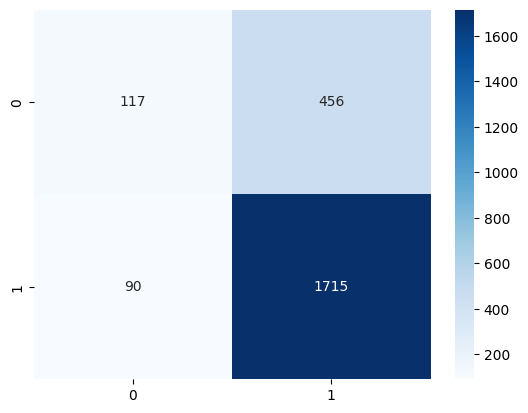

In [ ]:
# Khởi tạo và huấn luyện mô hình
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Dự đoán
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

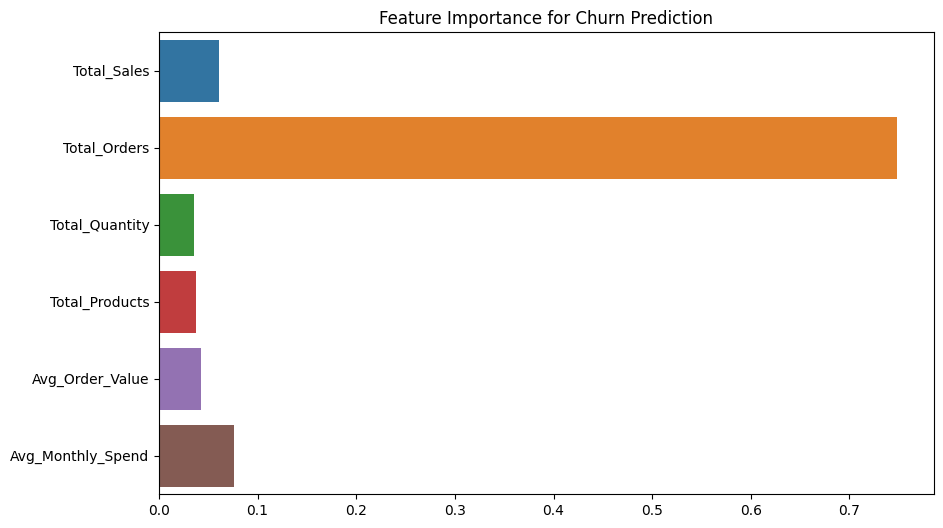

In [56]:
importances = xgb_model.feature_importances_
feat_names = df[features_without_recency].columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance for Churn Prediction")
plt.show()

**Conclusion:**
1. Total Orders is the most important factor.
2. The secondary factors play a very small role:
   - Avg_Monthly_Spend, Total_Sales have a slight influence.
   - Avg_Order_Value, Total_Products and Total_Quantity have almost no influence on churn/active distinction — at least in the current model.